# Importação das bibliotecas

In [46]:
from scipy.stats import t
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from typing import List
import matplotlib.pyplot as plt
import math


In [47]:
def obter_intervalo_confianca(dataframe: pd.DataFrame):    
    conf_level = 0.95
    media = dataframe['preco'].mean()
    std = dataframe['preco'].std()
    n = dataframe.shape[0]
    grausLiberdade = n - 1
    t_value = t.ppf((1 + conf_level) / 2, grausLiberdade)
    inf = media - t_value * std / np.sqrt(n)
    sup = media + t_value * std / np.sqrt(n)
    print('Média:', round(media), ' Desvio padrão:', round(std))
    print('Intervalo de confiança:', round(inf), '-', round(sup))

In [48]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None) -> pd.DataFrame:
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa.parquet')
    base_original = base_original.query(query)
    return base_original

In [49]:
def obter_estatistica(bairros: List[str], base_original_completa: pd.DataFrame) -> pd.DataFrame:
    lista_dados = []
    for bairro in bairros:
        dados_temp = base_original_completa.query(
            f'bairro_teste == "{bairro}"')
        lista_dados.append(
            {
                'bairro': bairro,
                'media_preco':  round(dados_temp['preco'].mean(), 2),
                'mediana_preco':  round(dados_temp['preco'].median(), 2),
                'moda': round(dados_temp['preco'].mode()[0], 2),
                'desvio_padrao': round(dados_temp['preco'].std(), 2),
                'total_imoveis': dados_temp.shape[0],
                'coeficiente_variacao': (round(dados_temp['preco'].std(), 2) / round(dados_temp['preco'].mean(), 2)) * 100
            }
        )
    df = pd.DataFrame(lista_dados)
    return df
  

- Preço Geral

In [50]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original['quarto'] = base_original['quarto'].str.replace('1 Quarto', '1').astype('int32')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


In [6]:
base_original = base_original.drop_duplicates()
base_original.shape

(8395, 9)

In [51]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9971
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tipo_imovel   9964 non-null   string 
 1   nome          9964 non-null   string 
 2   preco         9964 non-null   float64
 3   metragem      9964 non-null   string 
 4   quarto        9964 non-null   int32  
 5   banheiro      9964 non-null   string 
 6   garagem       9964 non-null   string 
 7   ID_CASA       9964 non-null   int64  
 8   bairro_teste  9964 non-null   string 
dtypes: float64(1), int32(1), int64(1), string(6)
memory usage: 739.5 KB


In [52]:
base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')

ValueError: invalid literal for int() with base 10: '-- '

In [7]:
base_original.describe()

,preco,quarto,ID_CASA
count,8395.00,8395.00,8395.00
mean,450640.89,2.32,2635153434.16
std,453436.77,0.77,98351619.28
min,61045.00,1.00,54472404.00
25%,215000.00,2.00,2603212877.50
50%,320000.00,2.00,2658818753.00
75%,520000.00,3.00,2678280998.00
max,8000000.00,20.00,2700624992.00


- Total Imóveis

In [8]:
base_original.groupby('bairro_teste').size().reset_index(name='count').sort_values(by='count', ascending=False).nlargest(50, 'count')


,bairro_teste,count
34,Jardim Botânico,739
9,Centro,736
98,Nova Aliança,661
51,Jardim Irajá,353
74,Jardim Paulista,315
137,Ribeirânia,235
8,Campos Eliseos,178
73,Jardim Palma Travassos,175
69,Jardim Olhos D Agua,172
29,Ipiranga,166


In [9]:
base_original.columns

Index(['tipo_imovel', 'nome', 'preco', 'metragem', 'quarto', 'banheiro',
       'garagem', 'ID_CASA', 'bairro_teste'],
      dtype='object')

- Total de imoveis ,Média, Moda e Mediana: Jardim Botânico, Centro, Nova Aliança, Jardim Irajá, Sumarezinho, Vila Tibério, Vila monte alegre 

In [10]:
bairros = ['Jardim Botânico', 'Centro', 'Nova Aliança', 'Jardim Irajá', 'Sumarezinho', 'Vila Tibério', 'Vila Monte Alegre', 'Bonfim Paulista', 'Jardim Nova Aliança Sul', 'Vila Tibério', 'Vila Virginia', 'Bonfim Paulista']

In [11]:
base_bairros = base_original[base_original['bairro_teste'].isin(bairros)]

In [12]:
base_bairros.head()

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
9,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2694181987,Jardim Botânico
14,Apartamento,"Apartamento com 2 Quartos à Venda, 84m²",298000.00,84,2,2,1,2586310967,Vila Monte Alegre


In [42]:
base_bairros.pivot_table(index='quarto', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Centro,Jardim Botânico,Jardim Irajá,Jardim Nova Aliança Sul,Nova Aliança,Sumarezinho,Vila Monte Alegre,Vila Tibério,Vila Virginia
quarto,,,,,,,,,,
1,6,103,111,35,9,186,0,21,5,1
2,92,165,254,85,20,236,104,44,43,134
3,40,402,328,206,21,229,13,12,41,6
4,1,64,46,26,3,10,1,0,0,0
5,2,2,0,1,0,0,0,0,0,0
20,0,0,0,0,0,0,0,1,0,0


In [45]:
base_bairros.pivot_table(index='banheiro', columns='bairro_teste', aggfunc='size', fill_value=0).sort_index()

bairro_teste,Bonfim Paulista,Centro,Jardim Botânico,Jardim Irajá,Jardim Nova Aliança Sul,Nova Aliança,Sumarezinho,Vila Monte Alegre,Vila Tibério,Vila Virginia
banheiro,,,,,,,,,,
1,69,164,151,64,11,245,72,40,31,135
12,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0
2,31,208,251,126,21,166,45,36,48,5
20,0,0,0,0,0,0,0,1,0,0
3,9,226,107,78,18,137,1,1,10,1
4,21,75,89,42,3,55,0,0,0,0
5,7,54,119,35,0,52,0,0,0,0
6,3,5,13,6,0,3,0,0,0,0


In [13]:
base_dados_bairros_selecionados = pd.DataFrame()
base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()
for bairro in bairros:
    print('=' * 40)
    base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
    print(f'{bairro}')
    print(f'Média -> {round(base_temp["preco"].mean(), 2)}')
    print(f'Max Preco -> {round(base_temp["preco"].max(), 2)}')
    print(f'Min Preco -> {round(base_temp["preco"].min(), 2)} ')
    print(f'Mediana -> {round(base_temp["preco"].median(), 2)}')
    print(f'Moda -> {round(base_temp["preco"].mode(), 2)}')
    print(f'Devio Padrão -> {round(base_temp["preco"].std(), 2)}')

    desvio_padrao = round(base_temp["preco"].std(), 2)
    media = round(base_temp["preco"].mean(), 2)

    media, desvio_padrao
    erro_padrao = desvio_padrao / math.sqrt(base_temp.shape[0])
    n = base_temp.shape[0] - 1

    intervalo_conf = norm.interval(0.95,  loc=media, scale=erro_padrao)
    print(intervalo_conf)
    print('=' * 40)

Jardim Botânico
Média -> 744389.39
Max Preco -> 8000000.0
Min Preco -> 180000.0 
Mediana -> 553000.0
Moda -> 0   320000.00
Name: preco, dtype: float64
Devio Padrão -> 720996.16
(692406.6911550541, 796372.0888449459)
Centro
Média -> 402076.73
Max Preco -> 3100000.0
Min Preco -> 92000.0 
Mediana -> 360000.0
Moda -> 0   450000.00
Name: preco, dtype: float64
Devio Padrão -> 223344.46
(385941.15790178004, 418212.3020982199)
Nova Aliança
Média -> 518588.2
Max Preco -> 2290000.0
Min Preco -> 133000.0 
Mediana -> 430000.0
Moda -> 0   350000.00
Name: preco, dtype: float64
Devio Padrão -> 300496.67
(495680.20788574417, 541496.1921142559)
Jardim Irajá
Média -> 600323.4
Max Preco -> 2150000.0
Min Preco -> 150000.0 
Mediana -> 450000.0
Moda -> 0   430000.00
Name: preco, dtype: float64
Devio Padrão -> 354985.06
(563291.9417843395, 637354.8582156606)
Sumarezinho
Média -> 245524.66
Max Preco -> 590000.0
Min Preco -> 117000.0 
Mediana -> 230000.0
Moda -> 0   170000.00
Name: preco, dtype: float64
Devio 

/tmp/ipykernel_5466/2288518998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()


In [14]:
import numpy as np
def obter_classes(total_linha: int):
    k = 1 + (10/3) * np.log10(total_linha)
    return int(round(k,0))

In [15]:
bairro = 'Centro'

In [16]:
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')

In [17]:
base_temp

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
91,Apartamento,"Apartamento com 3 Quartos à Venda, 100m²",330000.00,100,3,4,1,2671186862,Centro
119,Apartamento,"Apartamento com 3 Quartos à Venda, 153m²",650000.00,153,3,9,2,2667764212,Centro
185,Apartamento,"Apartamento com 2 Quartos à Venda, 68m²",320000.00,68,2,2,1,2662552450,Centro
257,Apartamento,"Apartamento com 3 Quartos à Venda, 107m²",290000.00,107,3,3,1,2682559732,Centro
366,Apartamento,"Apartamento com 2 Quartos à Venda, 66m²",214000.00,66,2,2,1,2698217406,Centro
...,...,...,...,...,...,...,...,...,...
9957,Apartamento,"Apartamento com 3 Quartos à Venda, 223m²",500000.00,223,3,4,2,2653849272,Centro
9965,Apartamento,"Apartamento com 3 Quartos à Venda, 128m²",400000.00,128,3,3,1,2629905962,Centro
9966,Apartamento,"Apartamento com 4 Quartos à Venda, 280m²",780000.00,280,4,5,3,2669521674,Centro
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro


In [18]:
base_temp['quarto'].unique()

array([3, 2, 1, 4, 5], dtype=int32)

In [19]:
base_um_quarto = base_temp.query('quarto == 1')
base_um_quarto

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
486,Apartamento,"Apartamento com Quarto à Venda, 66m²",170000.00,66,1,1,--,2568307400,Centro
721,Apartamento,"Apartamento com Quarto à Venda, 51m²",200000.00,51,1,1,1,2634770208,Centro
1280,Apartamento,"Apartamento com Quarto à Venda, 56m²",189000.00,56,1,1,1,2695611797,Centro
1336,Apartamento,"Apartamento com Quarto à Venda, 48m²",205000.00,48,1,1,1,2690494945,Centro
1389,Apartamento,"Apartamento com Quarto à Venda, 55m²",220000.00,55,1,1,1,2622861620,Centro
...,...,...,...,...,...,...,...,...,...
9450,Apartamento,"Apartamento com Quarto à Venda, 46m²",107000.00,46,1,1,1,2668425293,Centro
9466,Apartamento,"Apartamento com Quarto à Venda, 49m²",99000.00,49,1,1,1,2675769460,Centro
9576,Apartamento,"Apartamento com Quarto à Venda, 47m²",170000.00,47,1,2,1,2484959378,Centro
9652,Apartamento,"Apartamento com Quarto à Venda, 49m²",200000.00,49,1,2,1,2645092501,Centro


In [20]:
base_mais_quartos = base_temp.query('quarto in [2, 3, 4, 5]')
base_mais_quartos

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
91,Apartamento,"Apartamento com 3 Quartos à Venda, 100m²",330000.00,100,3,4,1,2671186862,Centro
119,Apartamento,"Apartamento com 3 Quartos à Venda, 153m²",650000.00,153,3,9,2,2667764212,Centro
185,Apartamento,"Apartamento com 2 Quartos à Venda, 68m²",320000.00,68,2,2,1,2662552450,Centro
257,Apartamento,"Apartamento com 3 Quartos à Venda, 107m²",290000.00,107,3,3,1,2682559732,Centro
366,Apartamento,"Apartamento com 2 Quartos à Venda, 66m²",214000.00,66,2,2,1,2698217406,Centro
...,...,...,...,...,...,...,...,...,...
9942,Apartamento,"Apartamento com 2 Quartos à Venda, 100m²",320000.00,100,2,3,1,2514013292,Centro
9957,Apartamento,"Apartamento com 3 Quartos à Venda, 223m²",500000.00,223,3,4,2,2653849272,Centro
9965,Apartamento,"Apartamento com 3 Quartos à Venda, 128m²",400000.00,128,3,3,1,2629905962,Centro
9966,Apartamento,"Apartamento com 4 Quartos à Venda, 280m²",780000.00,280,4,5,3,2669521674,Centro


#Teste de Hipótese quarto
#Teste de Hipótese banheiro	
#Teste de Hipótese garagem
#O preço de 1 quarto e menor que 2 e 3 quartos	
#O preço de 1 banheiro e menor que 2 e 3 banheiro	
#O preço de 1 garagem e menor que 2 e 3 garagem


In [21]:
base_mais_quartos.shape,  base_um_quarto.shape

((633, 9), (103, 9))

In [22]:
base_mais_quartos_cem = base_mais_quartos.sample(n=100,  random_state = 101).preco
base_um_quarto_cem = base_um_quarto.sample(n=100,  random_state = 101).preco

media_base_mais_quartos_cem = base_mais_quartos_cem.mean()
media_base_um_quarto_cem = base_um_quarto_cem.mean()


media_base_mais_quartos_cem = base_mais_quartos_cem.mean()
media_base_um_quarto_cem = base_um_quarto_cem.mean()


In [23]:
print(f'Média -> {round(base_temp["preco"].mean(), 2)}')
print(f'Max Preco -> {round(base_temp["preco"].max(), 2)}')
print(f'Min Preco -> {round(base_temp["preco"].min(), 2)} ')
print(f'Mediana -> {round(base_temp["preco"].median(), 2)}')
print(f'Moda -> {round(base_temp["preco"].mode(), 2)}')
print(f'Devio Padrão -> {round(base_temp["preco"].std(), 2)}')

print('=' * 40)

Média -> 402076.73
Max Preco -> 3100000.0
Min Preco -> 92000.0 
Mediana -> 360000.0
Moda -> 0   450000.00
Name: preco, dtype: float64
Devio Padrão -> 223344.46


In [24]:
import math
from scipy.stats import norm

desvio_padrao = round(base_temp["preco"].std(), 2)
media = round(base_temp["preco"].mean(), 2)

media, desvio_padrao
erro_padrao = desvio_padrao / math.sqrt(base_temp.shape[0])
n = base_temp.shape[0] - 1

intervalo_conf = norm.interval(0.95,  loc=media, scale=erro_padrao)
intervalo_conf


(385941.15790178004, 418212.3020982199)

In [25]:
obter_intervalo_confianca(dataframe=base_temp)

Média: 402077  Desvio padrão: 223344
Intervalo de confiança: 385915 - 418239


In [26]:
base_temp['preco'].unique()

array([ 330000.,  650000.,  320000.,  290000.,  214000.,  790000.,
        250000.,  750000.,  170000.,  345000.,  307400.,  260000.,
        200000.,  700000.,  300000.,  370000.,  450000.,  400000.,
        390000.,  430000.,  357000.,  360000.,  310000.,  189000.,
        205000.,  550000.,  380000.,  220000.,  385000.,  351000.,
        490000.,  340000.,  350000.,  480000.,  361000.,  119709.,
        285000.,  410000.,  470000.,  580000.,  482000., 1290000.,
        232000.,  510000.,  630000.,  225000.,  745000.,  354000.,
        240000.,  540000.,  500000.,  460000.,  800000.,  355000.,
        265000.,  190000.,  420000.,  680000.,  599000.,  395000.,
        415000.,  230000.,  403000.,  955000.,  760000.,  990000.,
        175000.,  158000.,  210000.,  552000.,  375000.,  642000.,
        398000.,  424000.,  150000.,  270000.,  583000.,  695000.,
        600000.,  248000.,  318000., 1600000.,  379000.,  138000.,
        780000.,  775000.,  341000.,  255000.,  185000., 11800

In [27]:
total_classes = obter_classes(base_temp.shape[0])
total_classes

11

# Teste gráficos

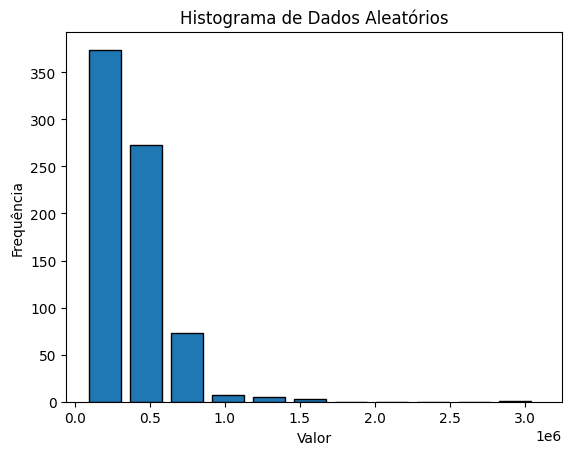

In [28]:
width = 0.8  # Ajuste a largura para criar espaço entre as barras

# Criar o histograma com ajuste na largura das barras
n, bins, patches = plt.hist(base_temp['preco'], bins=total_classes, edgecolor='black')

# Ajustar a largura das barras
for patch in patches:
    patch.set_width(width * (bins[1] - bins[0]))

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Dados Aleatórios')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='preco', ylabel='Count'>

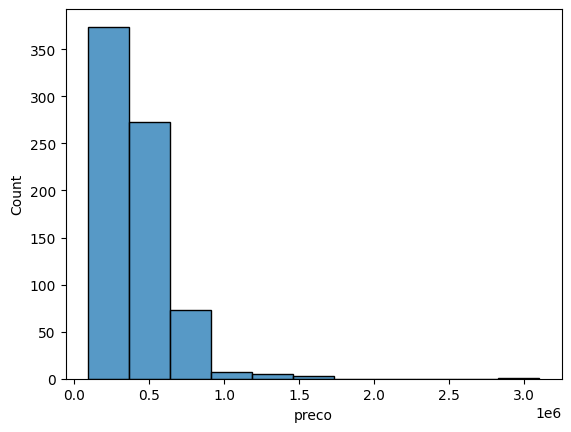

In [29]:
sns.histplot(base_temp, x='preco', bins=total_classes)

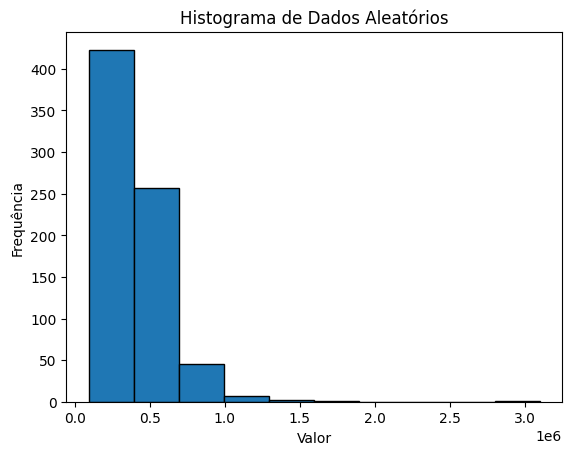

In [30]:
import matplotlib.pyplot as plt

# Gerar dados aleatórios


# Criar o histograma
plt.hist(base_temp['preco'], edgecolor='black' , )

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Dados Aleatórios')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()


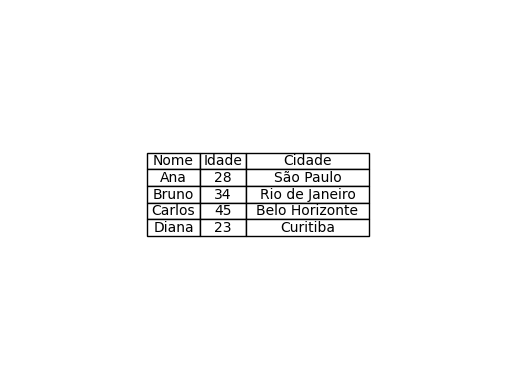

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar um DataFrame de exemplo
data = {
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Diana'],
    'Idade': [28, 34, 45, 23],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba']
}
df = pd.DataFrame(data)

# Criar uma nova figura e eixos
fig, ax = plt.subplots()

# Ocultar os eixos
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adicionar a tabela
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', rowLoc='center')

# Ajustar a tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=[0, 1, 2])

# Exibir a tabela
plt.show()


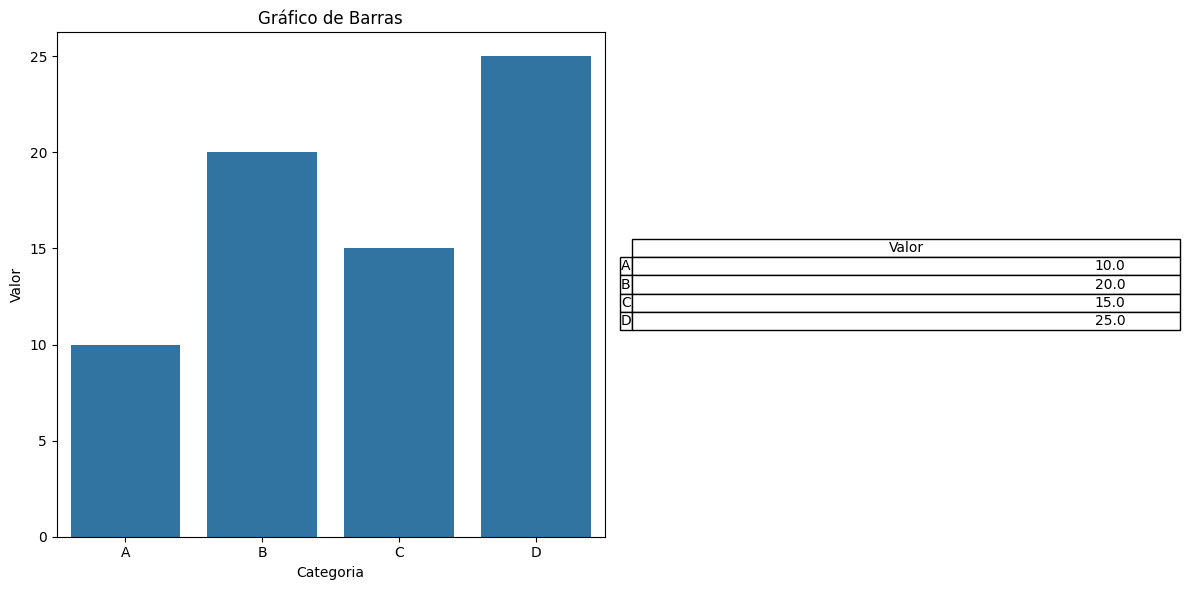

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar alguns dados de exemplo
data = pd.DataFrame({
    'Categoria': ['A', 'B', 'C', 'D'],
    'Valor': [10, 20, 15, 25]
})

# Configurar a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Criar o gráfico de barras com Seaborn
sns.barplot(x='Categoria', y='Valor', data=data, ax=ax1)
ax1.set_title('Gráfico de Barras')

# Criar a tabela com Matplotlib
table_data = data.pivot_table(index='Categoria', values='Valor')
ax2.axis('off')
tbl = ax2.table(cellText=table_data.values,
                colLabels=table_data.columns,
                rowLabels=table_data.index,
                loc='center')

# Ajustar layout
plt.tight_layout()
plt.show()
